In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
from sklearn import model_selection, preprocessing, metrics, svm

%matplotlib inline
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df['Gender'] = df.Gender.map({'Male':0, 'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
X,y = df.drop(columns=['User ID', 'Purchased']), df['Purchased']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, test_size=0.2, random_state=27)

X_train.shape, X_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [7]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

**Fitting SVM to the Training set**

In [8]:
svc = svm.SVC(kernel='linear', C=1.0, gamma='auto').fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.8125

**Predicting the Test set results**

In [10]:
print("Train score: {:.2f}".format(svc.score(X_train, y_train)))
print("Test score: {:.2f}".format(svc.score(X_test, y_test)))

Train score: 0.85
Test score: 0.81


**Making the Confusion Matrix**

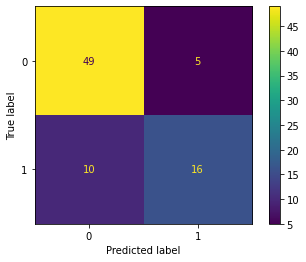

In [11]:
metrics.plot_confusion_matrix(svc, X_test, y_test);

**Visualising the Training set results**

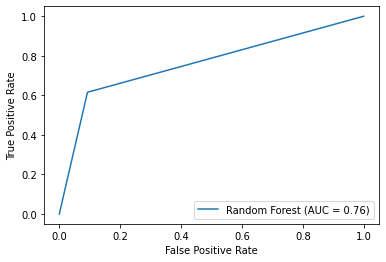

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot();

**Visualising the Test set results**